## OpenCV

OpenCV — Open Source Computer Vision Library —
это библиотека алгоритмов компьютерного зрения и обработки изображений.

Компьютерное зрение —
область знания, занимающаяся
вопросами создания искусственных систем,
способных
обнаруживать, отслеживать и классифицировать объекты путем
анализа цифровых изображений.

Для установки модуля cv2,
предоставляющего функциональные возможности OpenCV для
Python, необходимо выполнить в командной строке следующую
команду:

```sh
pip install opencv-python
```

### Загрузка изображения в память

Функция `imread` загружает изображение из указанного файла и возвращает его в виде объекта `numpy.array`.

Имеет следующий прототип:

```python
cv2.imread(filepath) -> retval : numpy.array
```

Здесь
- `filename` — имя загружаемого файла;
- `retval` — возвращаемое изображение (`numpy.array`).

Если изображение не может быть прочтено, то функция возвращает `None`.

Изображение следует загружать следующим образом:

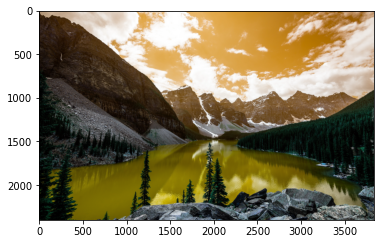

In [1]:
import sys, cv2
import matplotlib.pyplot as plt


image = cv2.imread('/content/sample_data/Picture.jpg')

if image is not None:
    # OK. начинаем обработку.
    plt.imshow(image)
    pass
else:
    sys.stderr.write('Изображение не может быть загружено.')

### Оконные функции OpenCV

Для создания окна визуализации изображения применяется функция

```python
# Здесь параметр `windowName` означает название окна, с помощью которого у нему будет происходить обращение.
cv2.namedWindow(windowName)
```

Для того чтобы указать оконной системе, что надо отобразить изображение,
применяется функция

```python
# Здесь `windowName` — название окна, `image` — цифровое изображение.
cv2.imshow(windowName, image)
```
Обработка событий отображения и взаимодействия пользователя с оконной
системой
начинается после запуска функции
```python
cv2.waitKey()
```

Эта функция блокирует дальнейшее исполнение скрипта до нажатия любой
\linebreak
клавиши.

Наконец, по завершении работы с оконной системой надо вызвать функцию

```python
cv2.destroyAllWindows()
```

In [ ]:
import cv2, sys

image = cv2.imread('/content/sample_data/Picture.jpg')

if image is not None:
    cv2.namedWindow('TestWindow')
    cv2.imshow('TestWindow', image)
    cv2.waitKey()
    cv2.destroyAllWindows()
else:
    sys.stderr.write('Изображение не может быть загружено.')

### Базовые инструменты для обработки изображений

#### Цветовые пространства

Для задания цвета с помощью фиксированного числа некоторых
характеристик (каналов)
применяются различные системы,
называемые
*цветовыми
пространствами*
или
*цветовыми моделями*.

*Глубина цвета* или *качество цветопередачи*
—
количество бит,
используемое для хранения и представления цвета при кодировании одного пикселя.

###### RGB

В цветовой модели `RGB`
изображение состоит из трех независимых каналов —
двумерных массивов (каждый элемент которых имеет 8 разрядов):
красного,
зеленого и синего.

###### Полутоновая модель

В полутоновой модели каждый пиксель представляется одним значением,
несущим информацию о яркости,
т.е. в изображении присутствуют только оттенки серого.

##### Функция `cvtColor`

Функция

```python
cv2.cvtColor(source, code) -> dst
```

преобразует изображение из одного пространства цветов в другое.

Здесь
- `source` — входное изображение (8-разрядное беззнаковое, 16-разрядное беззнаковое или с плавающей точкой одинарной точности (`float`));
- `dst` — выходное отображение того же размера;
- `code` — код преобразования пространства цветов.

Цветовая модель, подразумеваемая по умолчанию в OpenCV,
на самом деле хранит пиксели с измененным порядком каналов,
а именно в порядке `BGR`.

##### Некоторые коды для функции `cvtColor`

- `cv2.COLOR_BGR2RGB` —
переводит изображение из принимаемой по умолчанию OpenCV цветовой модели
BGR в цветовую модель RGB (т.е. меняет местами красный и синий);
- `cv2.COLOR_BGR2GRAY` —
переводит изображение в цветовой модели BGR
в
полутоновое;
- `cv2.COLOR_GRAY2BGR` —
переводит полутоновое изображение в цветовую
модель RGB
по
формуле

$$
Y = 0{,}299R + 0{,}587 G + 0{,}114 B,
$$

где $Y$ — число, характеризующее серый цвет.

##### Задание

Реализуйте скрипт,
который загружает изображение из файловой системы,
содержащее красный, синий и зеленый цвет,
а затем одновременно отображает три окна, в которых
выводятся:

- исходное изображение,
- преобразование исходного изображения с флагом `cv2.COLOR_BGR2RGB` и
- преобразование исходного изображения с флагом  `cv2.COLOR_BGR2GRAY`.

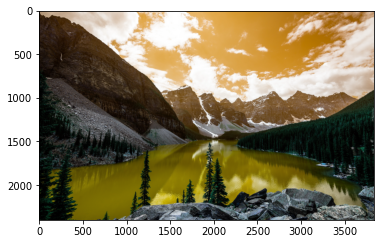

In [4]:
import cv2, sys
import matplotlib.pyplot as plt
image = cv2.imread('/content/sample_data/Picture.jpg')

if image is not None:
    plt.imshow(image)
else:
    sys.stderr.write('Изображение не может быть загружено.')

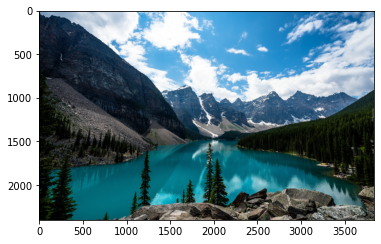

In [6]:
image = cv2.imread('/content/sample_data/Picture.jpg')

if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
else:
    sys.stderr.write('Изображение не может быть загружено.')

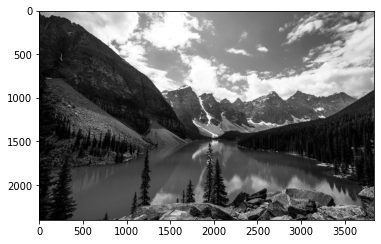

In [7]:
image = cv2.imread('/content/sample_data/Picture.jpg')

if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap = 'gray')
else:
    sys.stderr.write('Изображение не может быть загружено.')

#### Хронометраж

Обработка изображений может длиться долго.

Поэтому часто требуется
определить эффективность алгоритмов с точки зрения времени их выполнения.

Функция

```python
cv2.getTickCount() -> retval
```

возвращает количество тактов после некоторого определенного
события (например, времени запуска компьютера).

Функция

```python
cv2.getTickFrequency() -> retval
```

возвращает количество тактов, выполняемых в одну секунду.

In [8]:
import cv2

start = cv2.getTickCount()

image = cv2.imread('/content/sample_data/Picture.jpg')

end = cv2.getTickCount()

message = 'Время потраченное на загрузку изображения: %lf сек.'

print(message % ((end - start) / cv2.getTickFrequency()))

Время потраченное на загрузку изображения: 0.184198 сек.


##### Определение размеров изображения и числа каналов

Пусть `image` – успешно загруженное изображение.

Свойство `shape` объекта типа `numpy.array` позволяет определить размеры
этого объекта во всех измерениях.

Если изображение полутоновое,
то свойство `shape` возвращает высоту и ширину изображения:

```python
height, width = image.shape
```

Если же изображение содержит более одного канал,
то свойство `shape` имеет и третью компоненту – число каналов:

```python
height, width, nchannels = image.shape
```

Получить ширину и высоту изображения независимо от числа каналов можно следующим образом:

```python
width, height = image.shape[1], image.shape[0]
```

Свойство `ndim` содержит число размерностей массива `numpy.array`.

Также число размерностей можно вычислить как `nDim = len(image.shape)`.

##### Оперирование пикселями

Доступ к пикселю, местоположение которого определяется парой $(i, j)$,
можно
осуществлять следующим способом:

```python
pixelValue = image[j, i]
```

Эта операция возвращает массив или скалярное значение в зависимости от
количества каналов в изображении.

Пусть изображение представлено в цветовой модели BGR.

Тогда операция

```python
greenPart = image[j, i, 1]
```

возвращает зеленую составляющую пикселя.

Для получения сразу всех составляющих можно использовать следующую
операцию:

```python
b, g, r = image[j, i]
```

Если изображение является полутоновым,
то операция

```python
pixelValue = image[j, i]
```

возвращает единственное значение – оттенок серого.

Аналогично осуществляется запись значения оттенка серого и отдельных каналов в многоканальном изображении:

```python
grayImage[j, i] = pixelValue
bgrImage[j, i, 2] = redValue
anotherBGRImage[j, i] = blueValue, greenValue, redValue
```

Однако использование оператора индексирования `[]` рекомендуется только для
доступа к регионам изображения, а не для доступа к отдельным пикселям.

Для доступа к значениям пикселя эффективнее применять функцию

```python
numpy.array.item(*args)
```

Однако эта функция возвращает только скалярное значение.
Это означает, что если каналов несколько, то необходимо задавать также номер канала:

```python
pixelGreenValue = image.item(100, 100, 1)
```

##### Создание изображения в памяти

Поскольку OpenCV изображения в Python это массивы `numpy.array`,
то можно пользоваться известными функциями из `numpy`.

Функция

```python
numpy.zeros(shape, dtype=float)
```

создает массив, имеющий форму `shape`, заполненный нулями.

Функция

```python
numpy.ones(shape, dtype=float)
```

создает массив, имеющий форму `shape`, заполненный единицами.

Функция

```python
numpy.full(shape, fill_value, dtype=None)
```

создает массив, имеющий форму `shape`, заполненный значением `fill_value`.